# Lifestyle & Health Risk – EDA

This notebook performs the **Exploratory Data Analysis (EDA)** of the dataset `Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset (1).csv`.

Goals:
- Understand the structure of the data (shape, types, missing values).
- Explore the distributions of explanatory variables (age, weight, lifestyle habits...).
- Analyse the distribution of the target variable `health_risk`.
- Visualise the relationships between the features and the health risk level.

No machine learning model is trained here yet: we focus only on **understanding the data**.


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')



In [14]:
# Load data

file_path = "Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset (1).csv"

df = pd.read_csv(file_path)
print("Dataset shape (rows, columns):", df.shape)
display(df.head())


Dataset shape (rows, columns): (5000, 12)


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [15]:
# General information about the DataFrame

print("\nGeneral information:")
df.info()

print("\nVariable types present:")
print(df.dtypes.value_counts())

print("\nSummary of numerical variables:")
display(df.describe().T)

print("\nSummary of categorical variables:")
cat_cols = df.select_dtypes(include=["object", "category"]).columns
if len(cat_cols) > 0:
    display(df[cat_cols].describe().T)
else:
    print("No categorical variables detected.")



General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB

Variable types present:
object     7
int64      3
float64    2
Name: count, dtype: int64

Summary of numerical variables:


,count,mean,std,min,25%,50%,75%,max
age,5000.0,48.80560,17.906991,18.0,34.0,49.0,64.0,79.0
weight,5000.0,77.35920,18.714567,45.0,61.0,77.0,94.0,109.0
height,5000.0,171.93320,15.822225,145.0,158.0,171.5,186.0,199.0
sleep,5000.0,6.99706,1.432849,3.0,6.0,7.0,8.0,10.0
bmi,5000.0,26.84388,8.252490,11.4,20.3,26.0,32.4,51.4



Summary of categorical variables:


,count,unique,top,freq
exercise,5000,4,medium,1985
sugar_intake,5000,3,medium,2511
smoking,5000,2,no,4023
alcohol,5000,2,no,3741
married,5000,2,yes,3018
profession,5000,8,student,644
health_risk,5000,2,high,3490


In [16]:
# Missing values

na_counts = df.isna().sum()
na_percent = (na_counts / len(df)) * 100

missing_df = pd.DataFrame({
    "missing_count": na_counts,
    "missing_percent": na_percent
}).sort_values("missing_percent", ascending=False)

print("Number and percentage of missing values per variable:")
display(missing_df)



Number and percentage of missing values per variable:


,missing_count,missing_percent
age,0,0.0
weight,0,0.0
height,0,0.0
exercise,0,0.0
sleep,0,0.0
sugar_intake,0,0.0
smoking,0,0.0
alcohol,0,0.0
married,0,0.0
profession,0,0.0


Target distribution (counts):
health_risk
high    3490
low     1510
Name: count, dtype: int64

Target distribution (proportions):
health_risk
high    0.698
low     0.302
Name: proportion, dtype: float64


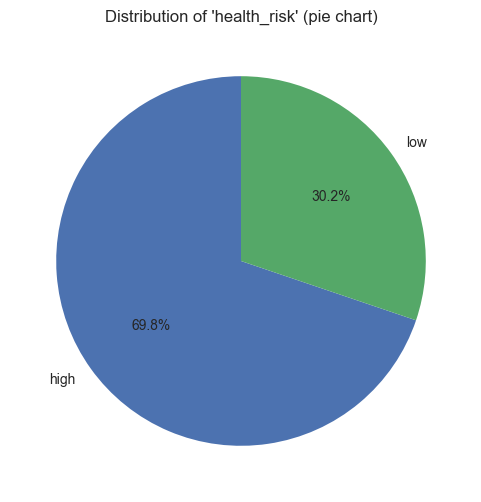

In [17]:
# Distribution of the target variable `health_risk`

target_col = "health_risk"

print("Target distribution (counts):")
print(df[target_col].value_counts())

print("\nTarget distribution (proportions):")
print(df[target_col].value_counts(normalize=True).round(3))


plt.figure(figsize=(6, 6))
df[target_col].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Distribution of 'health_risk' (pie chart)")
plt.show()


Numerical variables: ['age', 'weight', 'height', 'sleep', 'bmi']


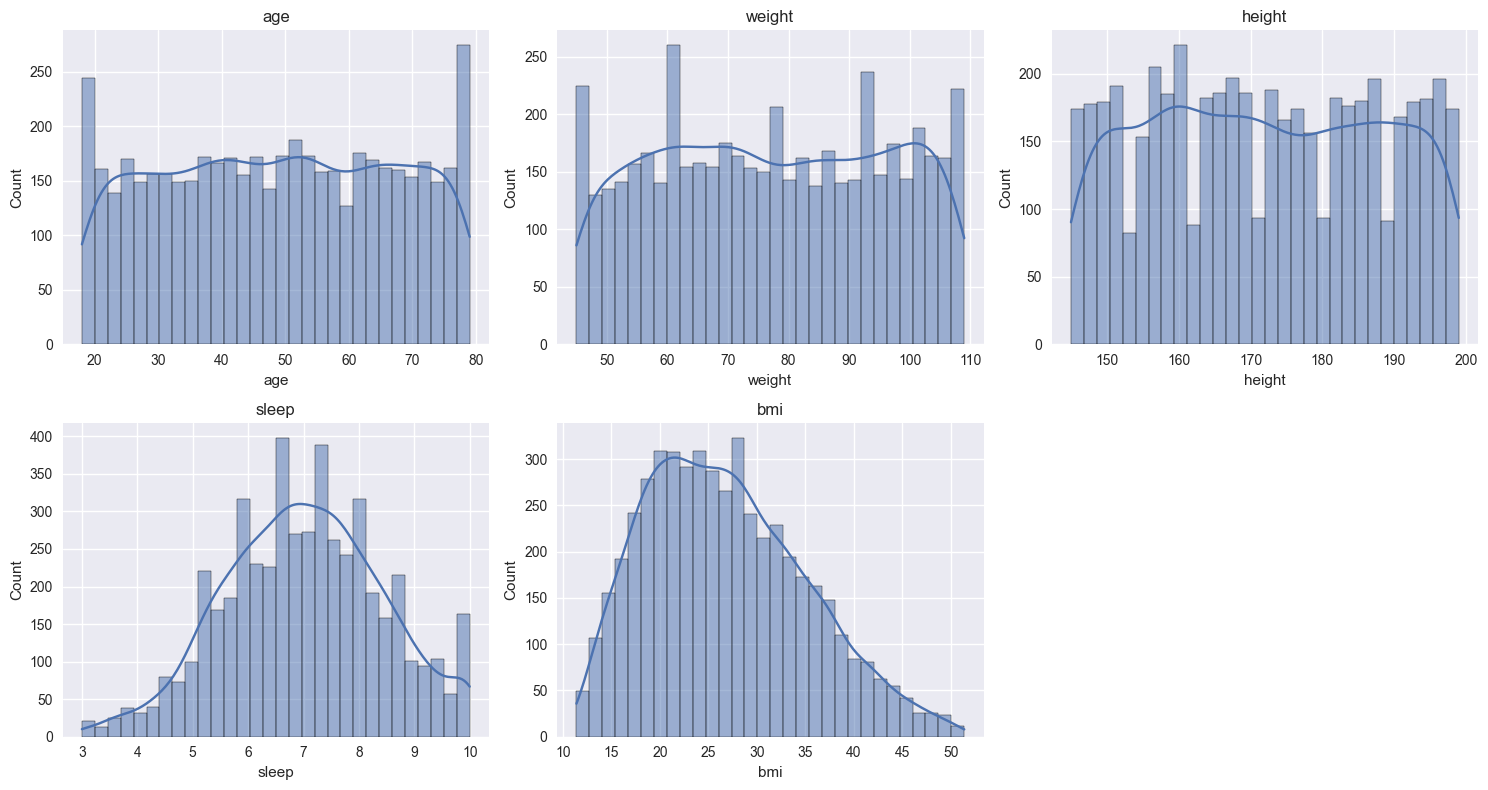

In [18]:
# Distributions of numerical variables

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("Numerical variables:", list(num_cols))

n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


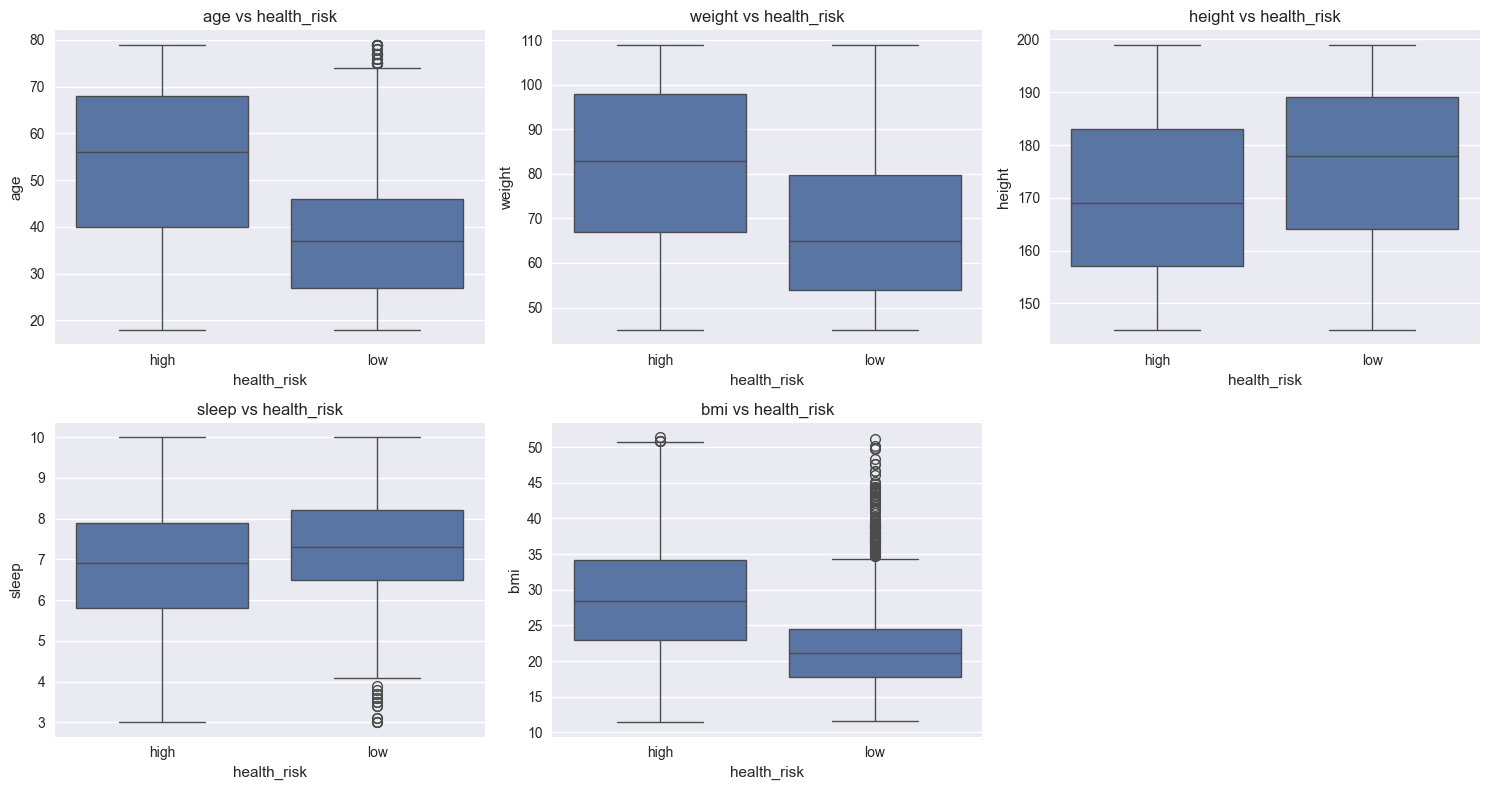

In [19]:
# Boxplots of numerical variables by health risk level

num_cols_no_target = [c for c in num_cols if c != target_col]

n_cols = 3
n_rows = int(np.ceil(len(num_cols_no_target) / n_cols))
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(num_cols_no_target, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x=target_col, y=col)
    plt.title(f"{col} vs {target_col}")
    plt.xlabel("health_risk")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


Categorical variables (excluding target): ['exercise', 'sugar_intake', 'smoking', 'alcohol', 'married', 'profession']


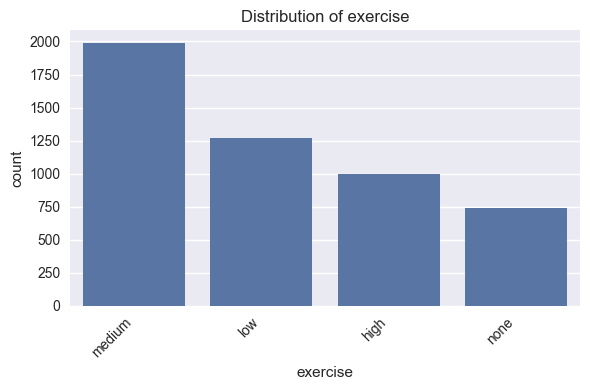

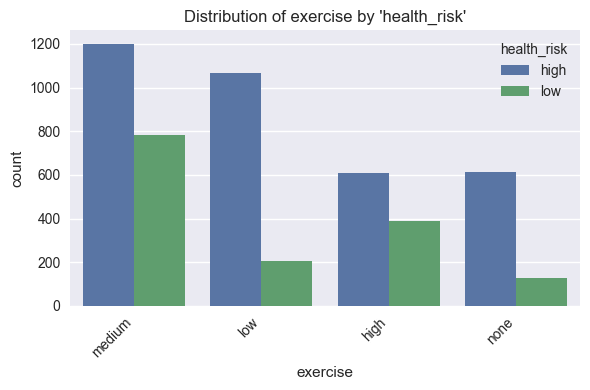

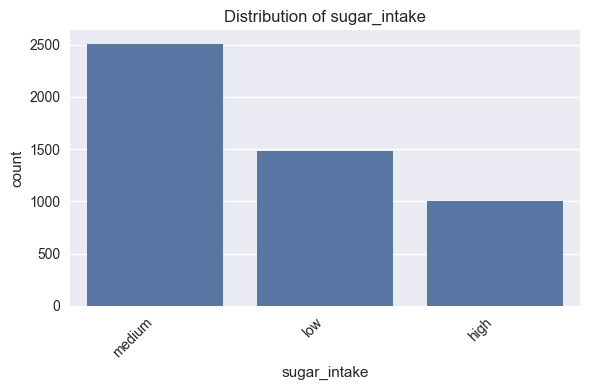

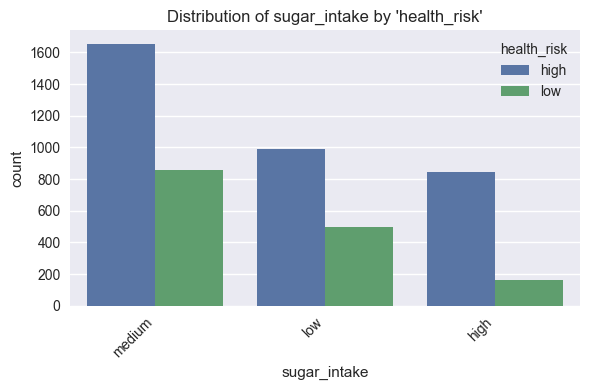

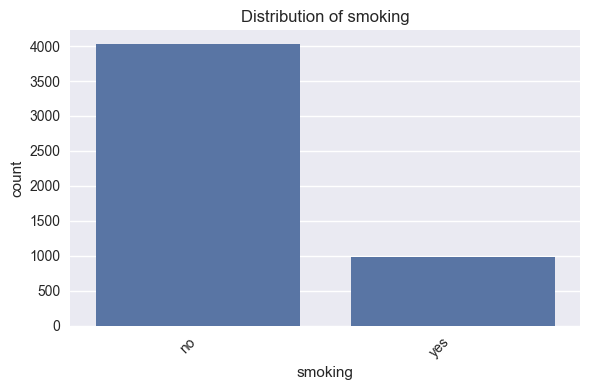

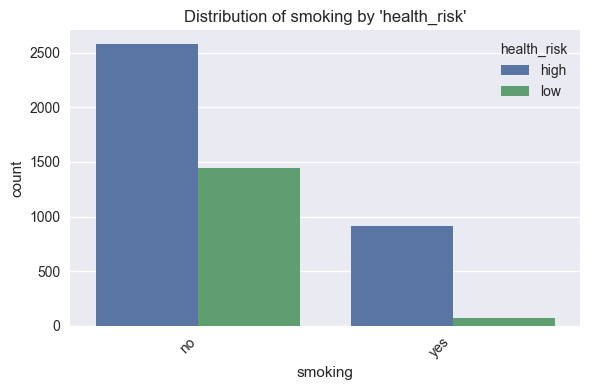

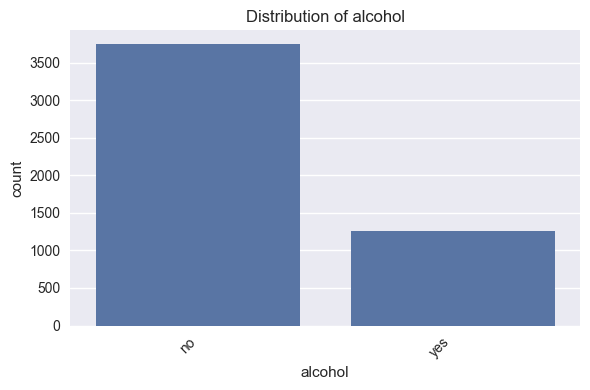

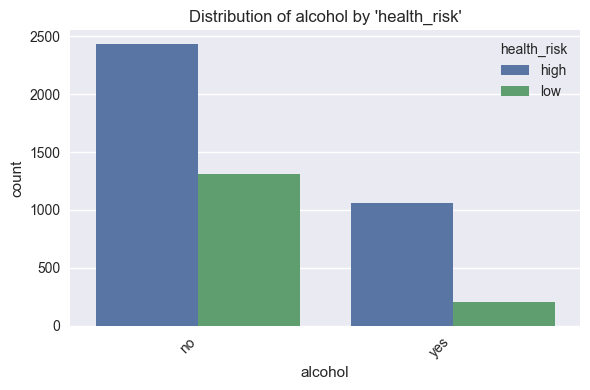

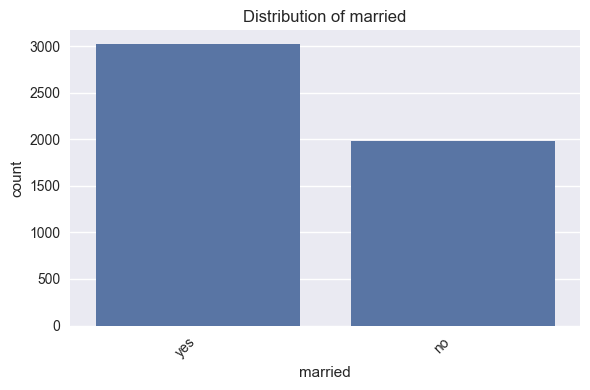

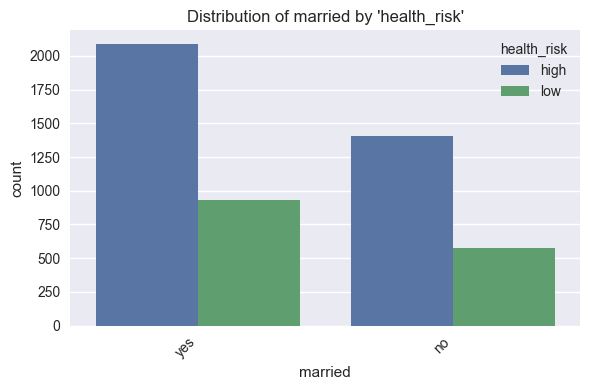

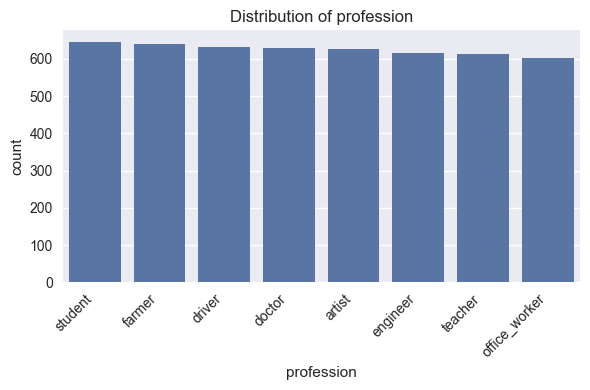

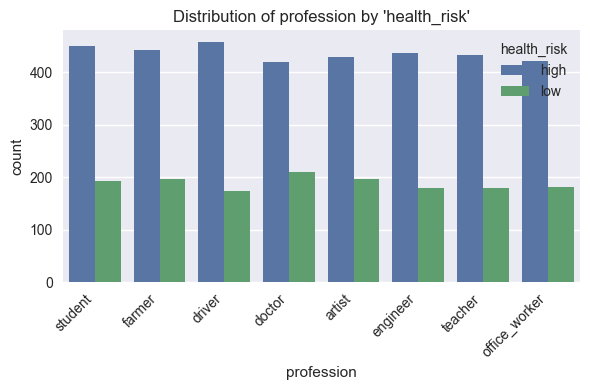

In [20]:
# Distribution of categorical variables

cat_cols = df.select_dtypes(include=["object", "category"]).columns
cat_cols = [c for c in cat_cols if c != target_col]

print("Categorical variables (excluding target):", list(cat_cols))

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Distribution by health risk level
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=target_col,
                  order=df[col].value_counts().index,
                  hue_order=df[target_col].value_counts().index)
    plt.title(f"Distribution of {col} by 'health_risk'")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


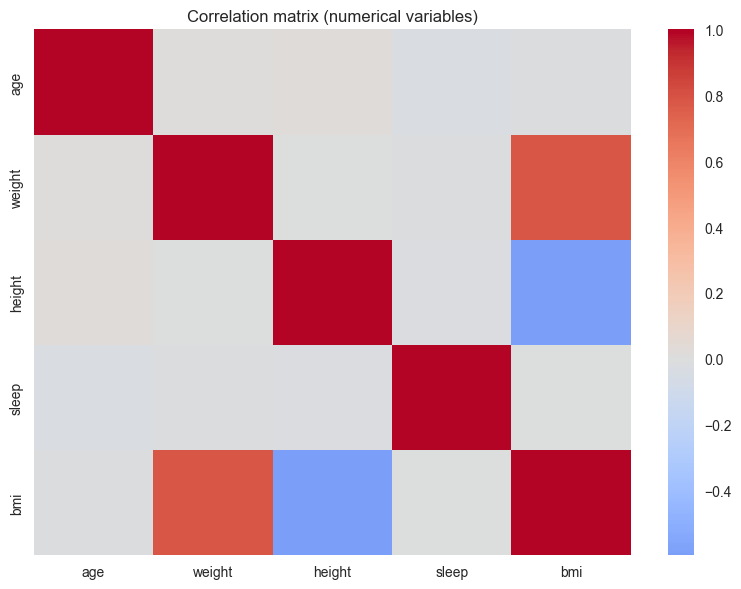

In [21]:
# Correlation matrix of numerical variables

plt.figure(figsize=(8, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation matrix (numerical variables)")
plt.tight_layout()
plt.show()


In [22]:
# Show numerical correlation matrix values

corr = df[num_cols].corr()
print("Correlation matrix (numerical variables):")
display(corr.round(3))


Correlation matrix (numerical variables):


,age,weight,height,sleep,bmi
age,1.000,0.010,0.021,-0.023,-0.011
weight,0.010,1.000,0.002,-0.013,0.785
height,0.021,0.002,1.000,-0.017,-0.596
sleep,-0.023,-0.013,-0.017,1.000,-0.002
bmi,-0.011,0.785,-0.596,-0.002,1.000


## EDA summary

The dataset contains lifestyle and health-related variables for several thousand individuals, with a clean tabular structure and a mix of numerical (age, weight, height, sleep, bmi, etc.) and categorical features (exercise level, sugar_intake, smoking, alcohol, married, profession). The target variable `health_risk` is a categorical variable with a small number of levels (e.g. *low / medium / high*), and its distribution appears reasonably balanced, so there is no extreme class imbalance.

There are essentially no missing values in the dataset, so no heavy imputation is required. Pairwise correlations between numerical variables are generally low, indicating no strong multicollinearity issues between features.

From the histograms and boxplots by `health_risk`, higher risk levels tend to be associated with less healthy lifestyles (for example, higher BMI and sugar intake, and possibly less sleep and exercise), while lower risk levels correspond to more favourable lifestyle patterns. Categorical plots (exercise, smoking, alcohol, profession, etc.) also show clear differences in the proportion of individuals across `health_risk` levels, suggesting that these features should be informative for classification in the later modelling stage.
